# Tarea sobre Algebra Lineal con Python

## Ejercicio 1:
En data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diferente espaciamiento ,por ejemplo:

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]

El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de nump 1

In [65]:
import numpy as np

In [66]:
# tu codigo aqui (~ 5 lineas de codigo):
v1 = np.arange(0,0.5,0.1)
v2 = np.arange(0.5,0.6,0.01)
v3 = np.arange(0.6,1.01,0.1)
xs = np.hstack((v1,v2,v3))
xs

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

## Ejercicio 2: 

Suavizado de curvas a través de promedios de n-puntos(medias móviles):

<img src="https://www.luisllamas.es/wp-content/uploads/2017/03/arduino-filtro-media-movil-ventana-5.png">

En el mundo la data comunmente posee "ruido" por lo cual muchas veces antes de hacer análisis o modelado se necesita "suavizar" las curvas para reducir este ruido, una técnica muy sencilla es  el suavizado por promedio de n-puntos(también llamado media móvil), esto significa que para cada punto Xn obtenemos una versión transformada(suavizada) que consiste en promediar n puntos cercanos a el, por ejemplo para n= 3 tenemos que:

$$XS_{n}  =  \frac{X_{n-1}+X_{n}+X_{n+1}}{3}$$

In [67]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000

ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1):
    ys[n] = (y[n-1] + y[n] + y[n+1])/3



    

In [68]:
import matplotlib.pyplot as plt

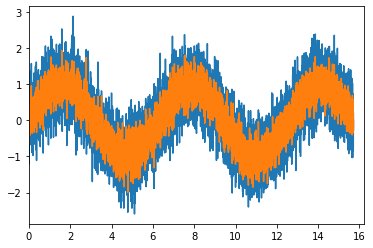

In [69]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

In [70]:
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido


ys =  y.copy()
y1 = np.hstack((ys[0],y[0:-2],ys[-1]))
y3 = np.hstack((ys[0],y[2:],ys[-1]))

ys = (y1+ys+y3)/3
print(ys)


[ 0.43208714 -0.06079448 -0.1879257  ... -0.27998019 -0.48756216
 -0.59309082]


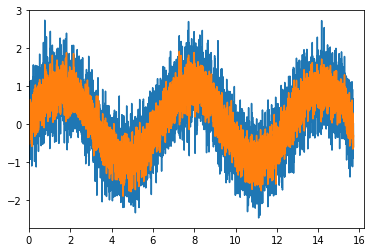

In [71]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

## Ejercicio 3
Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$


In [72]:
def calcula_valores_entropia(distribucion):
    informacion = np.log2(distribucion)*-1
    return distribucion*informacion
calcula_valores_entropia(np.array([0.25,0.75]))

array([0.5       , 0.31127812])

## Ejercicio 4

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

Se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [73]:
def g(x):
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    return ganancia
    

In [74]:
def c(x):
    costo = (np.power(x,2.0) + x + np.log(0.0001*x) - np.sqrt(0.54*x)) / 100
    return costo

In [75]:
def ganancia_neta(x,g,c):
    return g(x) - c(x)

In [76]:
gastos = np.array([100,50,25])
ganancia = g(gastos)
print("Ganancias:",ganancia)
costo = c(gastos)
print("Costos:",costo)
g_neta = ganancia_neta(gastos,g,c)
print("Ganancia neta:",g_neta)

Ganancias: [20399.73735829  2599.82010025   337.37862871]
Costos: [100.88046361  25.3950553    6.40334301]
Ganancia neta: [20298.85689469  2574.42504495   330.9752857 ]


## Ejercicio 5: 
Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [77]:
# np.unique --> https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

def mode(x):
    item_x, cant_x = np.unique(x, return_counts=True)
    max = np.argmax(cant_x)
    #retorno de tupla
    return (item_x[max], cant_x[max])

print(mode(np.array([1,5,2,3,4,5,5,2,7])))

(5, 3)


## Ejercicio 6: 
Crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [78]:
def calcula_entropia(x):
    return np.sum(calcula_valores_entropia(x))
calcula_entropia(np.array([0.25,0.75]))

0.8112781244591328

## Ejercicio 7:
En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aunque para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que el logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [79]:
def calcular_entropia_cruzada(s,l):
    s_log = s.copy()
    s_log[s_log <= 0] = 0
    s_log[s_log > 0] = np.log(s[s > 0])
    print (s_log)
    return -1.0* np.sum(l*s_log)
s = np.array([0.7,0.2,0.1])
l = np.array([1.0,0.0,0.0])
calcular_entropia_cruzada(s,l)

[-0.35667494 -1.60943791 -2.30258509]


0.35667494393873245